In [1]:
import os 
import matplotlib.pyplot as plt

root = ''
chapter_id = 'Regresion'
images_path = os.path.join(root, 'images',chapter_id)
os.makedirs(images_path,exist_ok=True)

def save_fig (fig_id, tigh_layout=True, fig_extension='png',resolution=True):
    path = os.path.join(images_path,fig_id + '.'+fig_extension)
    print('save figure',fig_id)
    if tigh_layout:
        plt.tigh_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)

In [2]:
# set up 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# split data ke train & test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing['data'],housing['target'],random_state=42)
# split data train ke valid dan train
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [4]:
housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
#housing di split ke dalam train dan testing
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)
print(housing['data'].shape)
print(housing['target'].shape)

(15480, 8)
(15480,)
(5160, 8)
(5160,)
(20640, 8)
(20640,)


In [ ]:
#housing train data di split 

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation ='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)    
])

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics='accuracy')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 1ms/step - loss: 1.6419 - accuracy: 0.0028 - val_loss: 0.8077 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 865us/step - loss: 0.7047 - accuracy: 0.0029 - val_loss: 0.6736 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 858us/step - loss: 0.6345 - accuracy: 0.0029 - val_loss: 0.6243 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 856us/step - loss: 0.5977 - accuracy: 0.0029 - val_loss: 0.5977 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 857us/step - loss: 0.5706 - accuracy: 0.0029 - val_loss: 0.5708 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: 0.5472 - accuracy: 0.0029 - val_loss: 0.5538 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 862us/step - loss: 0.5288 - accuracy: 0.0029 - val_loss: 0.5370 - val_accuracy: 0

In [7]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 596us/step - loss: 0.4190 - accuracy: 0.0021


In [8]:
#predict
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 79ms/step


array([[0.3276103],
       [1.7185786],
       [3.3415678]], dtype=float32)

In [9]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [25]:
data=pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,1.641871,0.002756,0.807653,0.004393
1,0.704697,0.002929,0.673631,0.004393
2,0.634542,0.002929,0.624266,0.004393
3,0.597736,0.002929,0.597663,0.004393
4,0.570629,0.002929,0.570844,0.004393
5,0.547246,0.002929,0.553816,0.004393
6,0.528757,0.002929,0.536956,0.004393
7,0.513012,0.002929,0.525667,0.004393
8,0.499158,0.002929,0.514190,0.004393
9,0.487499,0.002929,0.504004,0.004393


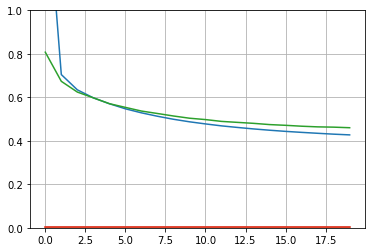

In [23]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# FUNCTIONAL API

Pada sebuah classification dia menggunakan output layer sebanyak n-jumlah klasifikasi dengan kalkulasi sesuai fungsi aktivasi dengan loss function adalah sebuha cross entropy 

TAPI

regresion dia menggunakan single output layer dengan tidak menggunakan fungsi aktivasi yang mana loss function mengguanakn mean squared error

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
# deep pola
input_ = keras.layers.Input(shape=X_train.shape[1:])#Feature => input
# sebuah input_ di call like a function passing it input
hidden1 = keras.layers.Dense(30, activation ='relu')(input_)
# sebuah hidden1 di call like a function passing it input 
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
# make the concat layers for concate the hidden layers

# concat = wide pola , deep pola
concat = keras.layers.Concatenate()([input_,hidden2])

# output layers = take two pola
output = keras.layers.Dense(1)(concat)

# create model
model= keras.Model(inputs=[input_],outputs=[output])


In [38]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics='accuracy')
history=model.fit(X_train,y_train,epochs=10,validation_data=[X_valid,y_valid])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8422 - accuracy: 0.0028 - val_loss: 0.7855 - val_accuracy: 0.0044
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.0029 - val_loss: 0.6893 - val_accuracy: 0.0044
Epoch 3/10
363/363 [==============================] - 0s 986us/step - loss: 0.6472 - accuracy: 0.0029 - val_loss: 0.6295 - val_accuracy: 0.0044
Epoch 4/10
363/363 [==============================] - 0s 983us/step - loss: 0.5944 - accuracy: 0.0029 - val_loss: 0.5954 - val_accuracy: 0.0044
Epoch 5/10
363/363 [==============================] - 0s 970us/step - loss: 0.5538 - accuracy: 0.0029 - val_loss: 0.5587 - val_accuracy: 0.0044
Epoch 6/10
363/363 [==============================] - 0s 964us/step - loss: 0.5217 - accuracy: 0.0029 - val_loss: 0.5367 - val_accuracy: 0.0044
Epoch 7/10
363/363 [==============================] - 0s 972us/step - loss: 0.4970 - accuracy: 0.0029 - val_loss: 0.5165 - val_accuracy: 0.0

In [40]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.842244,0.002842,0.785489,0.004393
1,0.725798,0.002929,0.689284,0.004393
2,0.647216,0.002929,0.629541,0.004393
3,0.594412,0.002929,0.595374,0.004393
4,0.553823,0.002929,0.558656,0.004393
5,0.521708,0.002929,0.536738,0.004393
6,0.497048,0.002929,0.516545,0.004393
7,0.478368,0.002929,0.502409,0.004393
8,0.463349,0.002929,0.490693,0.004393
9,0.451512,0.002929,0.480058,0.004393
